In [2]:
library("ggplot2", lib.loc="~/R/x86_64-pc-linux-gnu-library/3.4")

In [4]:
movie_df <- read.csv("Movie-Ratings.csv")

In [7]:
head(movie_df)

Film,Genre,Rotten.Tomatoes.Ratings..,Audience.Ratings..,Budget..million...,Year.of.release
(500) Days of Summer,Comedy,87,81,8,2009
"10,000 B.C.",Adventure,9,44,105,2008
12 Rounds,Action,30,52,20,2009
127 Hours,Adventure,93,84,18,2010
17 Again,Comedy,55,70,20,2009
2012,Action,39,63,200,2009


In [10]:
colnames(movie_df) <- c("Film","Genre","Critic.rating","Audience.rating","Budget","Year")

In [11]:
head(movie_df)

Film,Genre,Critic.rating,Audience.rating,Budget,Year
(500) Days of Summer,Comedy,87,81,8,2009
"10,000 B.C.",Adventure,9,44,105,2008
12 Rounds,Action,30,52,20,2009
127 Hours,Adventure,93,84,18,2010
17 Again,Comedy,55,70,20,2009
2012,Action,39,63,200,2009


In [12]:
str(movie_df)

'data.frame':	562 obs. of  6 variables:
 $ Film           : Factor w/ 562 levels "10,000 B.C.",..: 9 1 3 2 4 5 6 7 8 10 ...
 $ Genre          : Factor w/ 7 levels "Action","Adventure",..: 3 2 1 2 3 1 3 5 3 3 ...
 $ Critic.rating  : int  87 9 30 93 55 39 40 50 43 93 ...
 $ Audience.rating: int  81 44 52 84 70 63 71 57 48 93 ...
 $ Budget         : int  8 105 20 18 20 200 30 32 28 8 ...
 $ Year           : int  2009 2008 2009 2010 2009 2009 2008 2007 2011 2011 ...


In [13]:
summary(movie_df)

          Film           Genre     Critic.rating  Audience.rating
 10,000 B.C.:  1   Action   :154   Min.   : 0.0   Min.   : 0.00  
 127 Hours  :  1   Adventure: 29   1st Qu.:25.0   1st Qu.:47.00  
 12 Rounds  :  1   Comedy   :172   Median :46.0   Median :58.00  
 17 Again   :  1   Drama    :101   Mean   :47.4   Mean   :58.83  
 2012       :  1   Horror   : 49   3rd Qu.:70.0   3rd Qu.:72.00  
 27 Dresses :  1   Romance  : 21   Max.   :97.0   Max.   :96.00  
 (Other)    :556   Thriller : 36                                 
     Budget           Year     
 Min.   :  0.0   Min.   :2007  
 1st Qu.: 20.0   1st Qu.:2008  
 Median : 35.0   Median :2009  
 Mean   : 50.1   Mean   :2009  
 3rd Qu.: 65.0   3rd Qu.:2010  
 Max.   :300.0   Max.   :2011  
                               

In [15]:
## since Year is alco a categorial variable (factor in R), so lets convert it into a factor
unique(movie_df$Year)

[1] 2009 2008 2010 2007 2011

In [18]:
movie_df$Year<-factor(movie_df$Year)

In [19]:
str(movie_df) ## Notice year is now a factor

'data.frame':	562 obs. of  6 variables:
 $ Film           : Factor w/ 562 levels "10,000 B.C.",..: 9 1 3 2 4 5 6 7 8 10 ...
 $ Genre          : Factor w/ 7 levels "Action","Adventure",..: 3 2 1 2 3 1 3 5 3 3 ...
 $ Critic.rating  : int  87 9 30 93 55 39 40 50 43 93 ...
 $ Audience.rating: int  81 44 52 84 70 63 71 57 48 93 ...
 $ Budget         : int  8 105 20 18 20 200 30 32 28 8 ...
 $ Year           : Factor w/ 5 levels "2007","2008",..: 3 2 3 4 3 3 2 1 5 5 ...


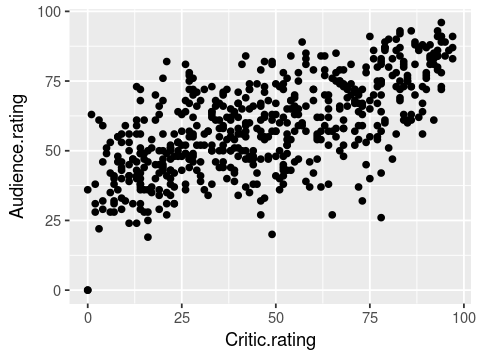

In [22]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

ggplot(data = movie_df, aes(x = Critic.rating, y= Audience.rating))+geom_point()

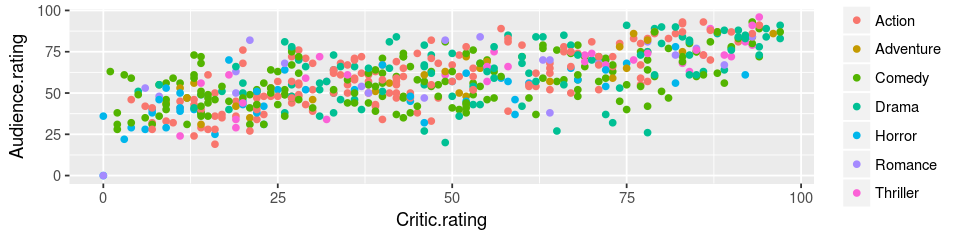

In [36]:
options(repr.plot.width=8,repr.plot.height = 2)
ggplot(data = movie_df, aes(x = Critic.rating, y= Audience.rating, color = Genre))+geom_point() 
#aesthetics layer+ geometry layer

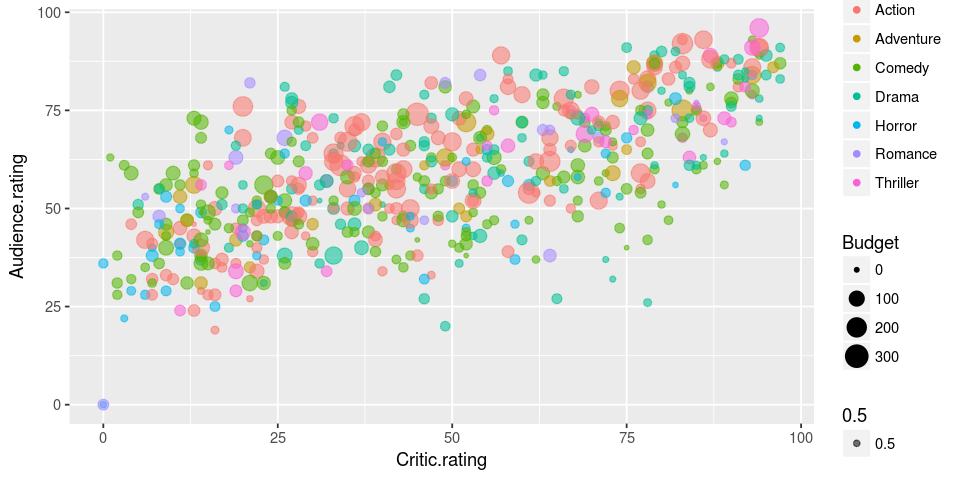

In [46]:
options(repr.plot.width=8,repr.plot.height = 4)
ggplot(data = movie_df, aes(x = Critic.rating, y= Audience.rating, color = Genre,size =Budget,alpha=0.5))+
geom_point()

# PLOTTING WITH LAYERS

In [53]:
# create a plot object
p <- ggplot(data = movie_df, aes(x = Critic.rating, y= Audience.rating, color = Genre,alpha=0.5)) 


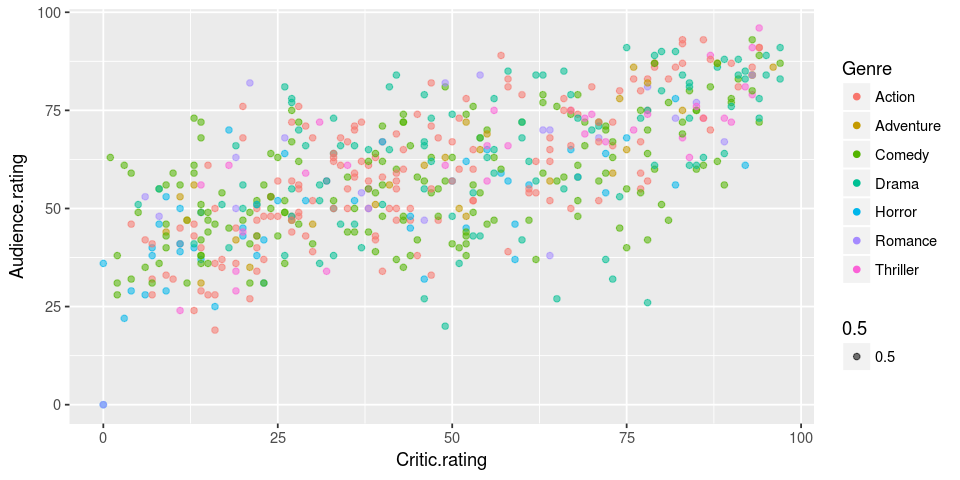

In [54]:
p + geom_point() # added layer of geometry to our plot

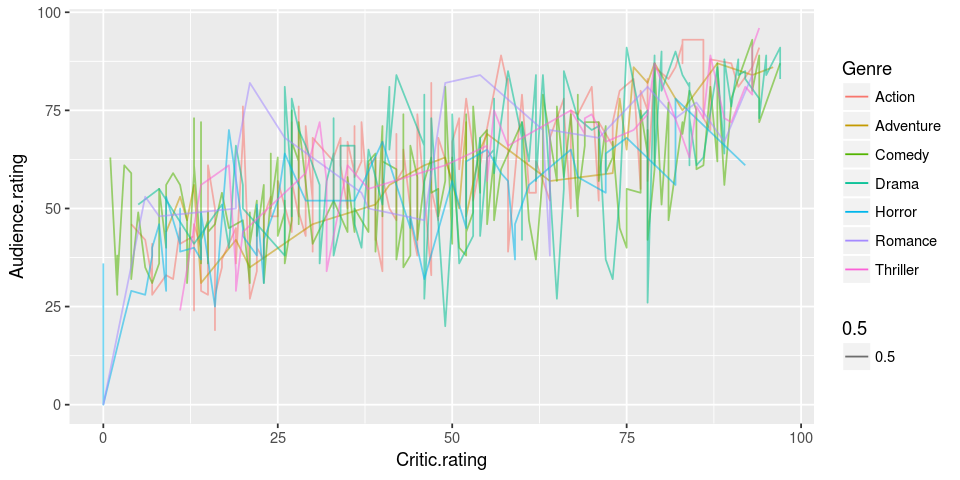

In [55]:
p + geom_line()

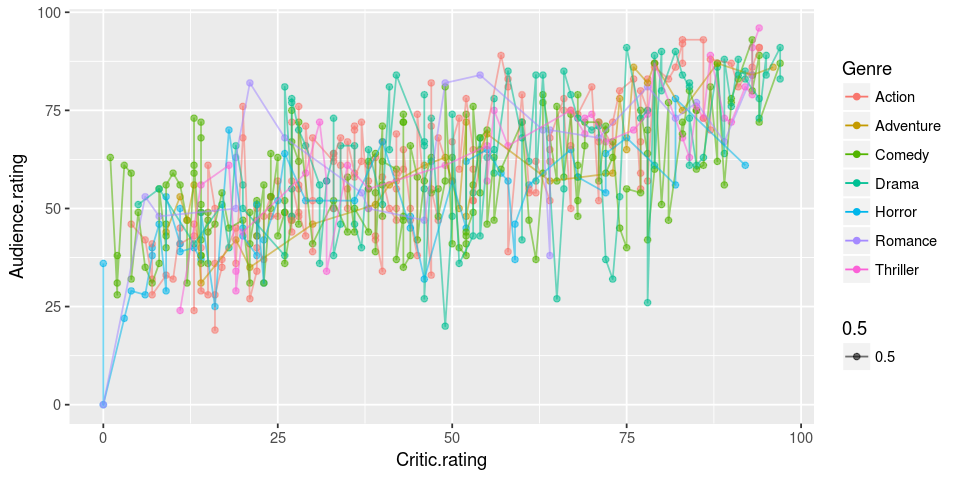

In [59]:
p +geom_point()+geom_line()

# OVERRIDING AESTHETICS

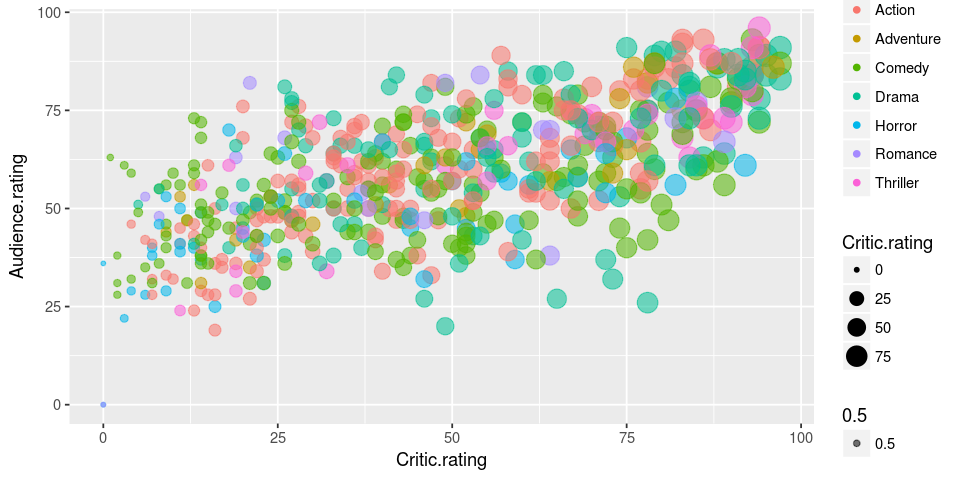

In [67]:
q <- p
q+ geom_point(aes(size=Critic.rating)) #overriding size

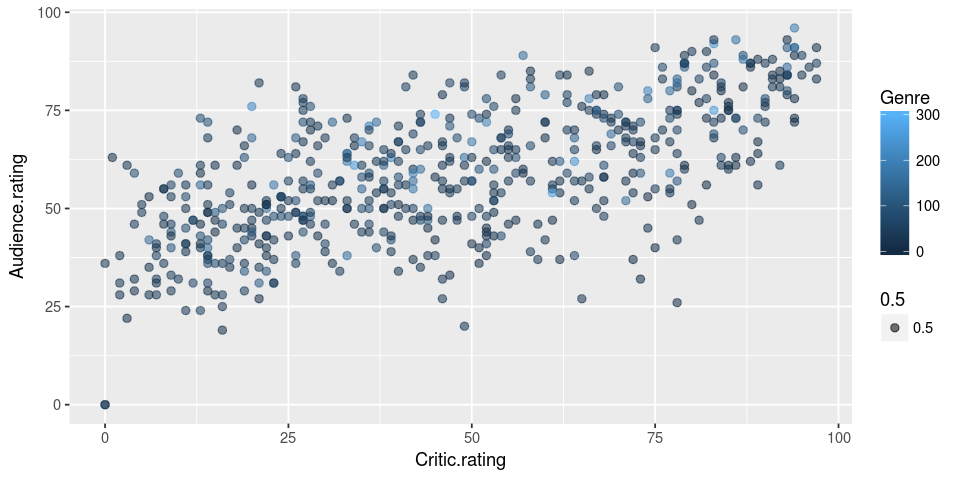

In [101]:
q + geom_point(aes(colour = Budget),size =2) #overriding color budget

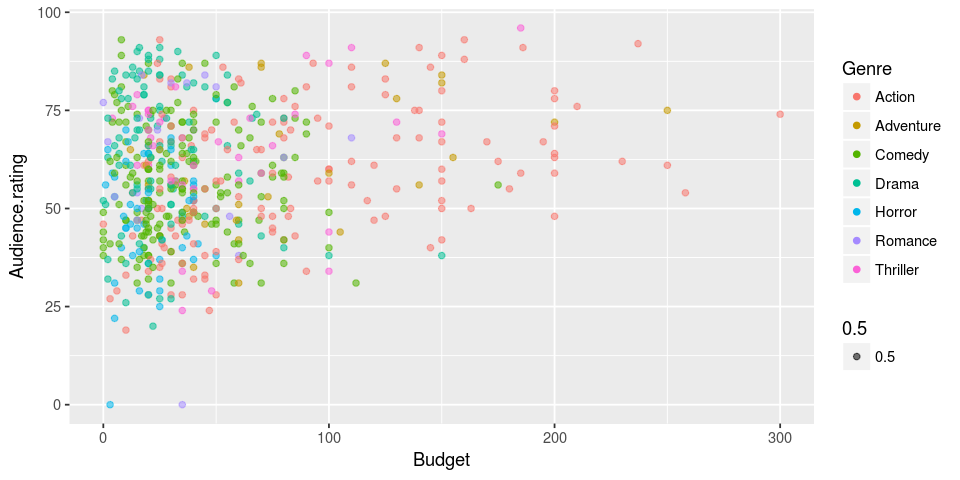

In [73]:
q + geom_point(aes(x = Budget)) + xlab("Budget")

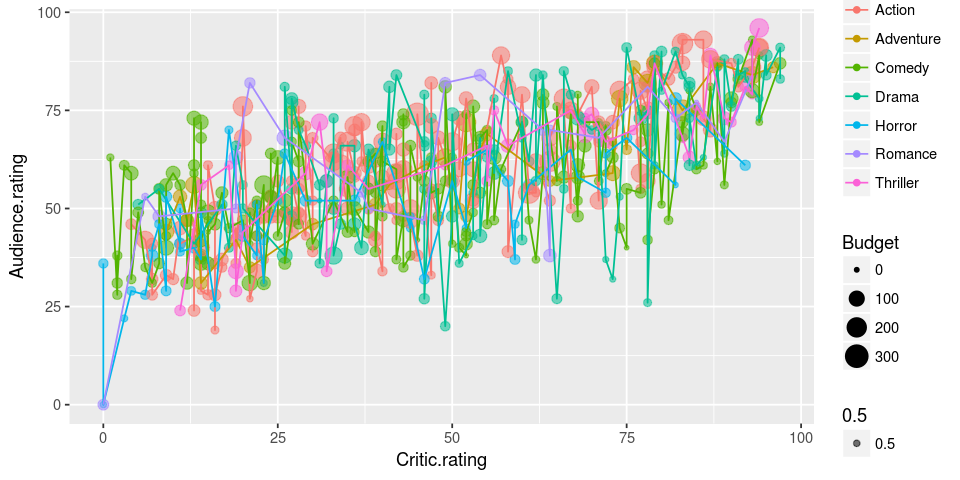

In [84]:
q + geom_point(aes(size=Budget))+ geom_line(size=0.5, alpha = 1)
#geompoint is overriding while geomline is setting

# MAPPING VS SETTING

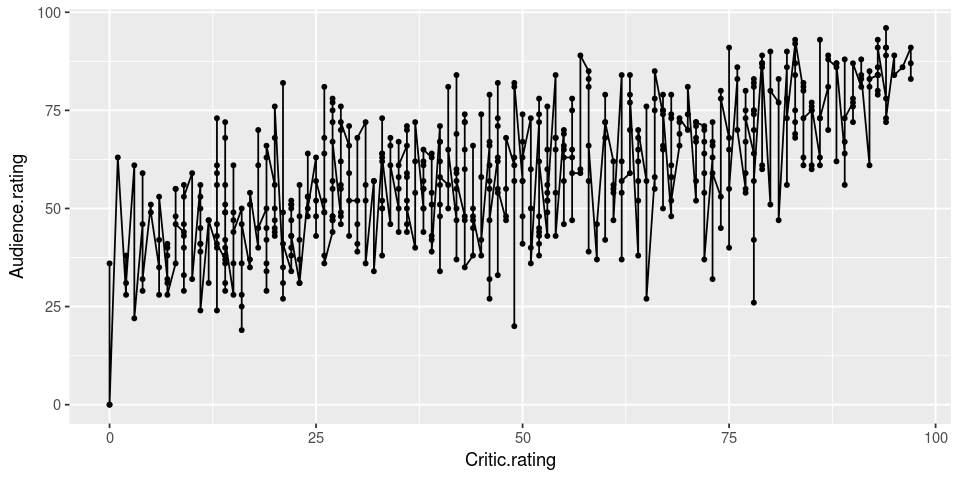

In [88]:
r <- ggplot(data = movie_df, aes(x = Critic.rating, y = Audience.rating))
r + geom_point(size = 1) + geom_line()

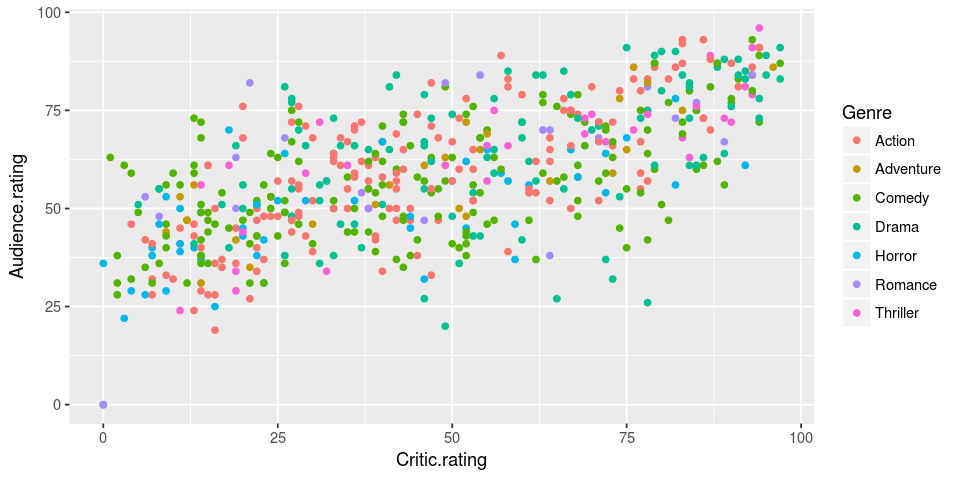

In [90]:
## Adding color by mapping

r + geom_point(aes(colour = Genre))

# MAPPING maps the aesthetic attribute to the column values
## colour is mapped to Genre values

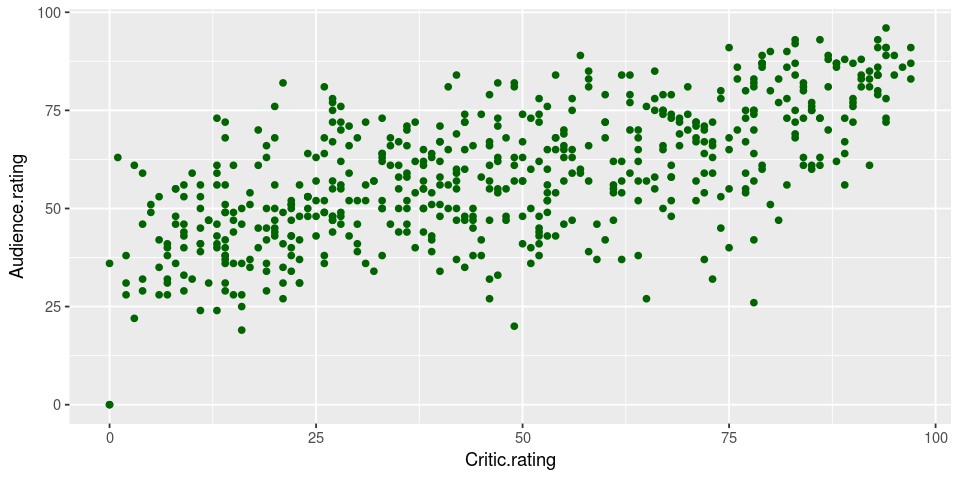

In [92]:
# Setting a colour

r + geom_point(colour = "DarkGreen")

#Setting just sets the color

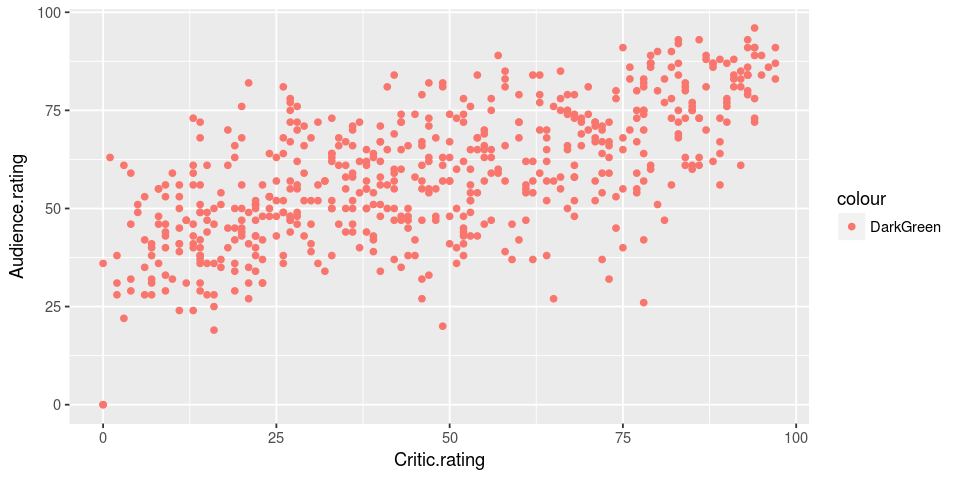

In [96]:
## ERROR
r + geom_point(aes(colour = "DarkGreen"))

## because its treating Darkgreen as a column value and maps all colour to it

# HISTOGRAMS AND DENSITY CHARTS 

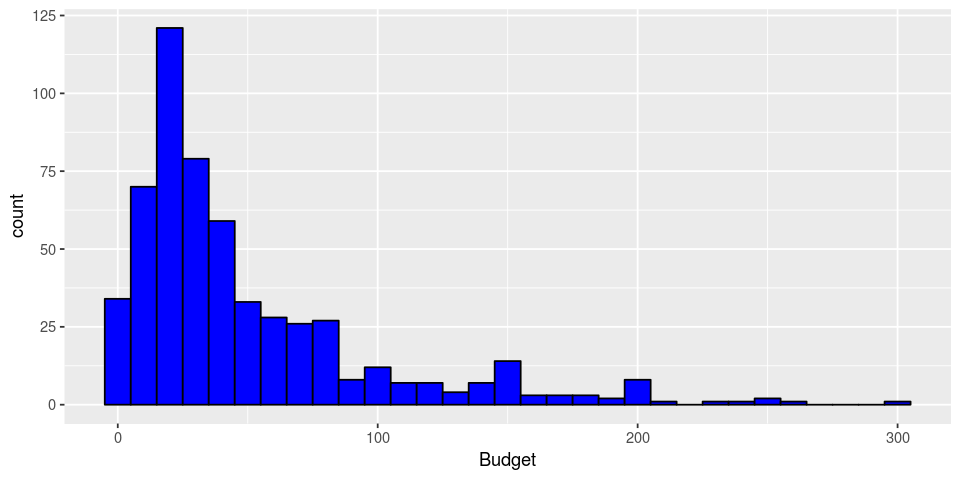

In [105]:
h <- ggplot(data = movie_df, aes(x = Budget))
h + geom_histogram(binwidth=10, fill = "blue", colour = "Black")

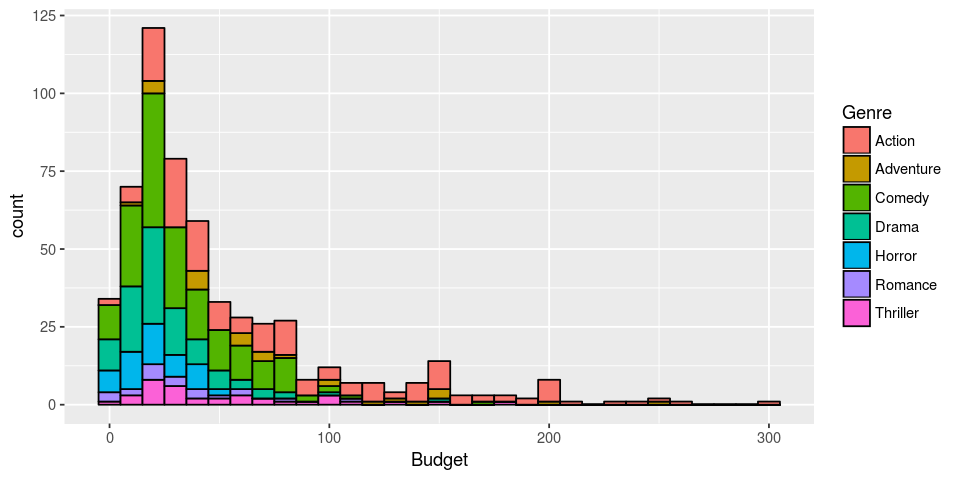

In [112]:
h + geom_histogram(binwidth = 10, aes(fill = Genre ), colour = "Black")

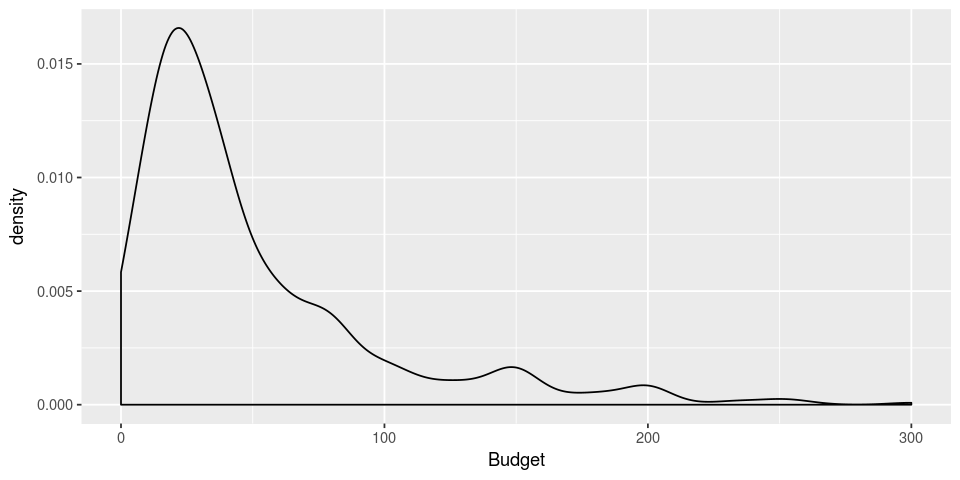

In [114]:
h + geom_density() #kde plot of data

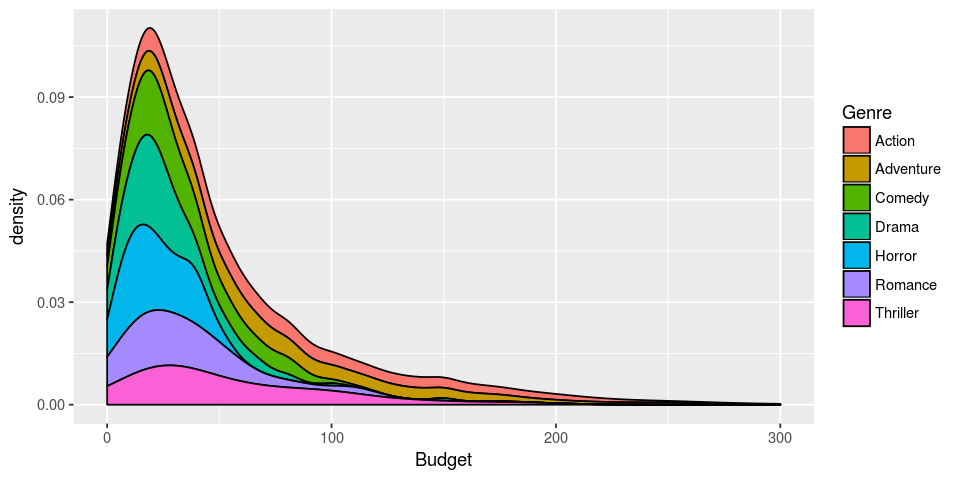

In [117]:
h + geom_density(aes(fill = Genre), position = "Stack")

# STATISTICAL ANALYSIS

`geom_smooth()` using method = 'loess'


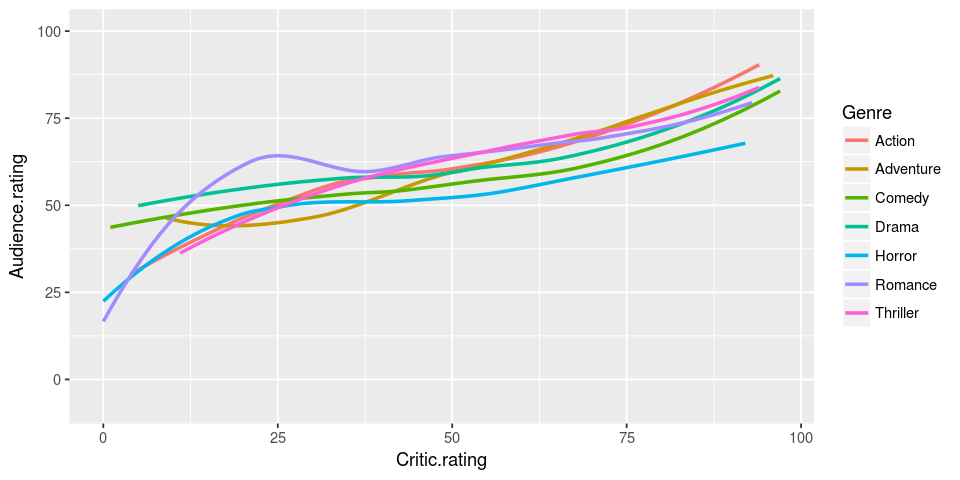

In [121]:
s <- ggplot(data = movie_df, aes(x = Critic.rating, y = Audience.rating, colour = Genre))
s + geom_smooth(fill = NA)  # shows trend in data

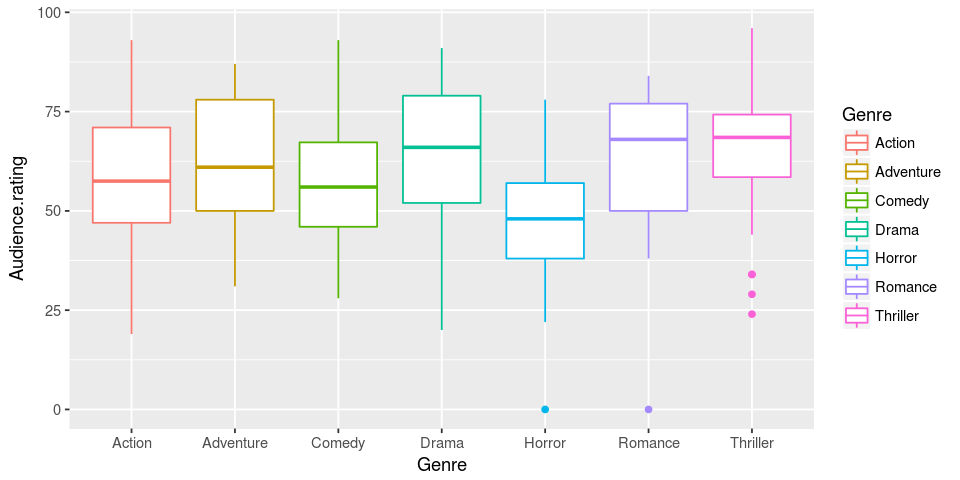

In [122]:
#box plot

t <- ggplot(data = movie_df , aes(x = Genre, y = Audience.rating, colour = Genre))
t + geom_boxplot()

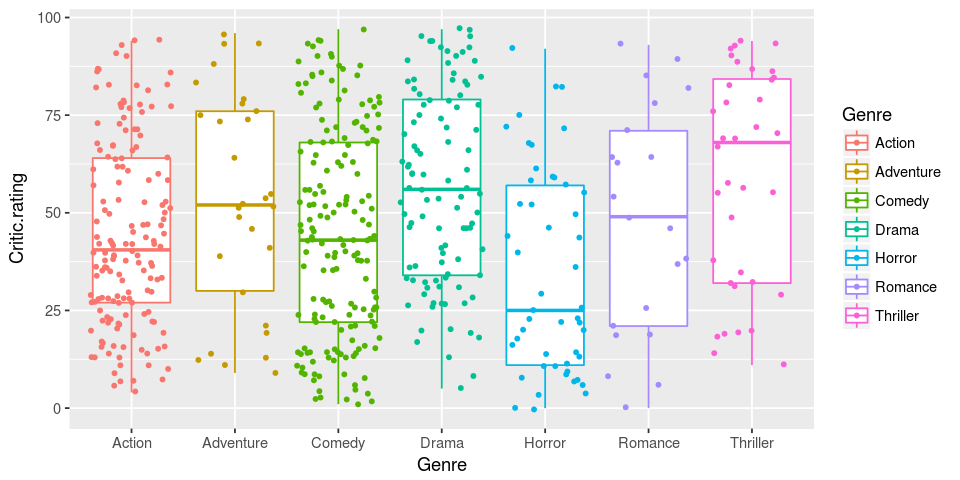

In [131]:
u <- ggplot(data = movie_df , aes(x = Genre, y = Critic.rating, colour = Genre))
u + geom_boxplot() + geom_jitter(size = 1)

# FACETS

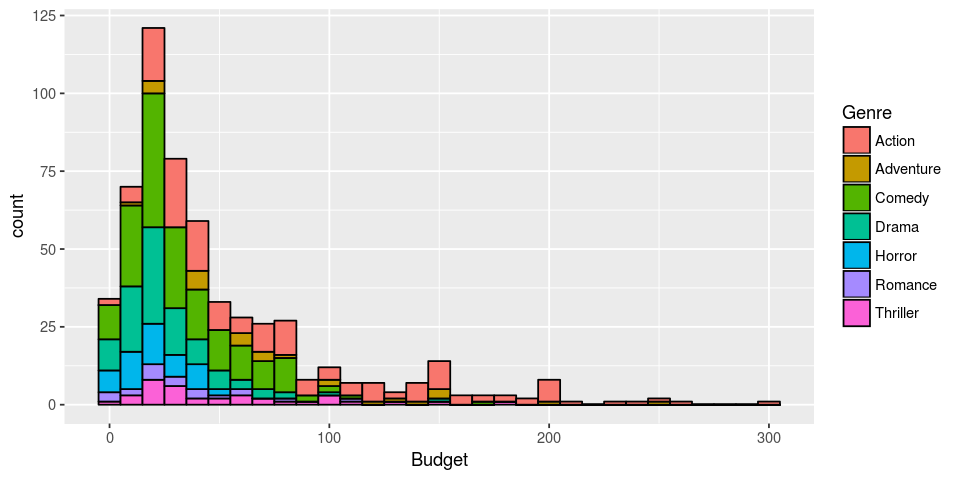

In [136]:
v <- ggplot(data= movie_df, aes(x = Budget, fill = Genre))
v + geom_histogram(binwidth =10, colour = "Black")

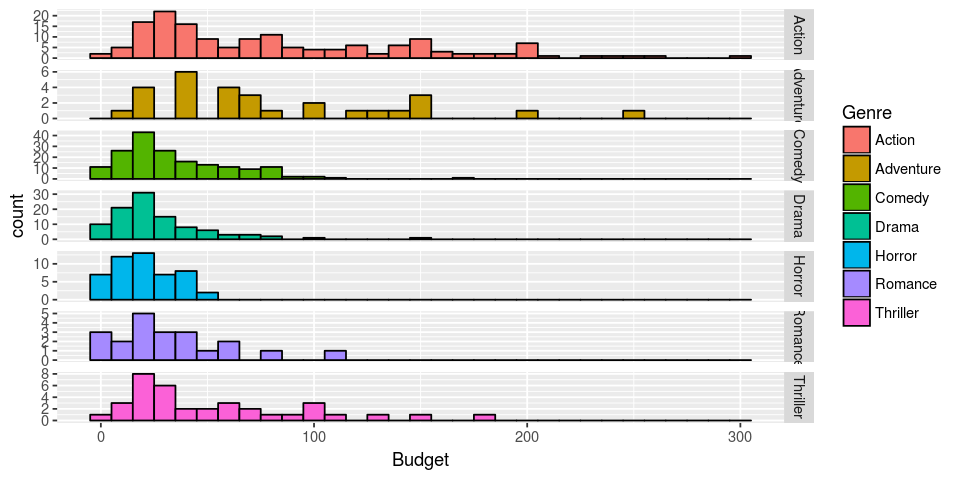

In [149]:
v + geom_histogram(binwidth =10, colour = "Black") + facet_grid(Genre~., scale = "free")

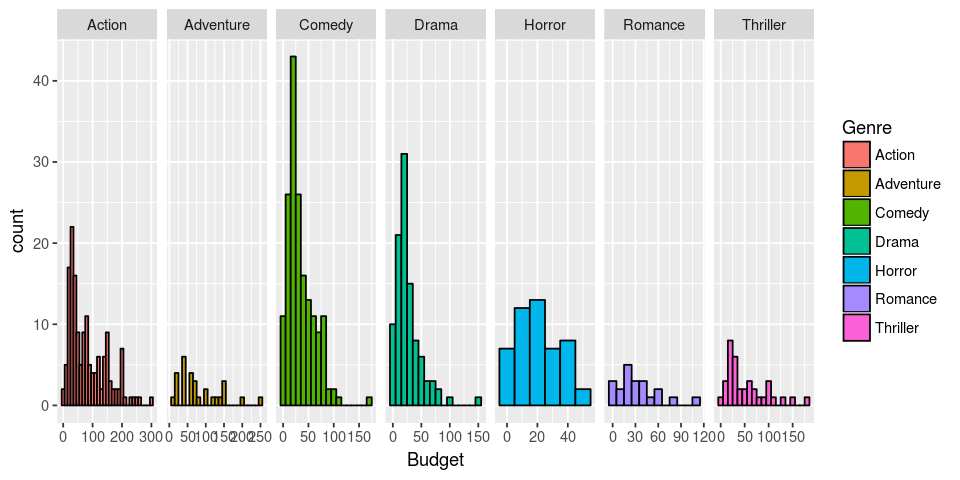

In [150]:
v + geom_histogram(binwidth =10, colour = "Black") + facet_grid(.~Genre, scale = "free")

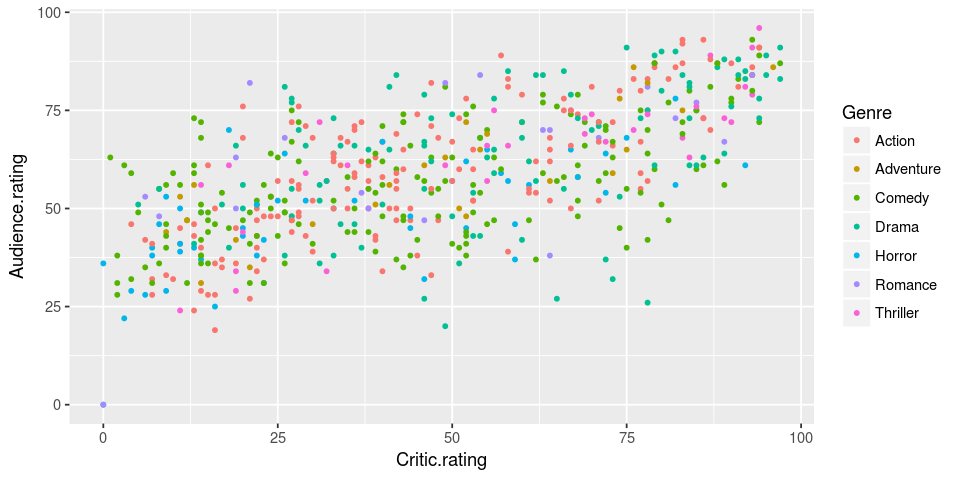

In [152]:
w <- ggplot(data = movie_df ,aes(x = Critic.rating, y =Audience.rating, colour = Genre))
w + geom_point(size=1)

`geom_smooth()` using method = 'loess'


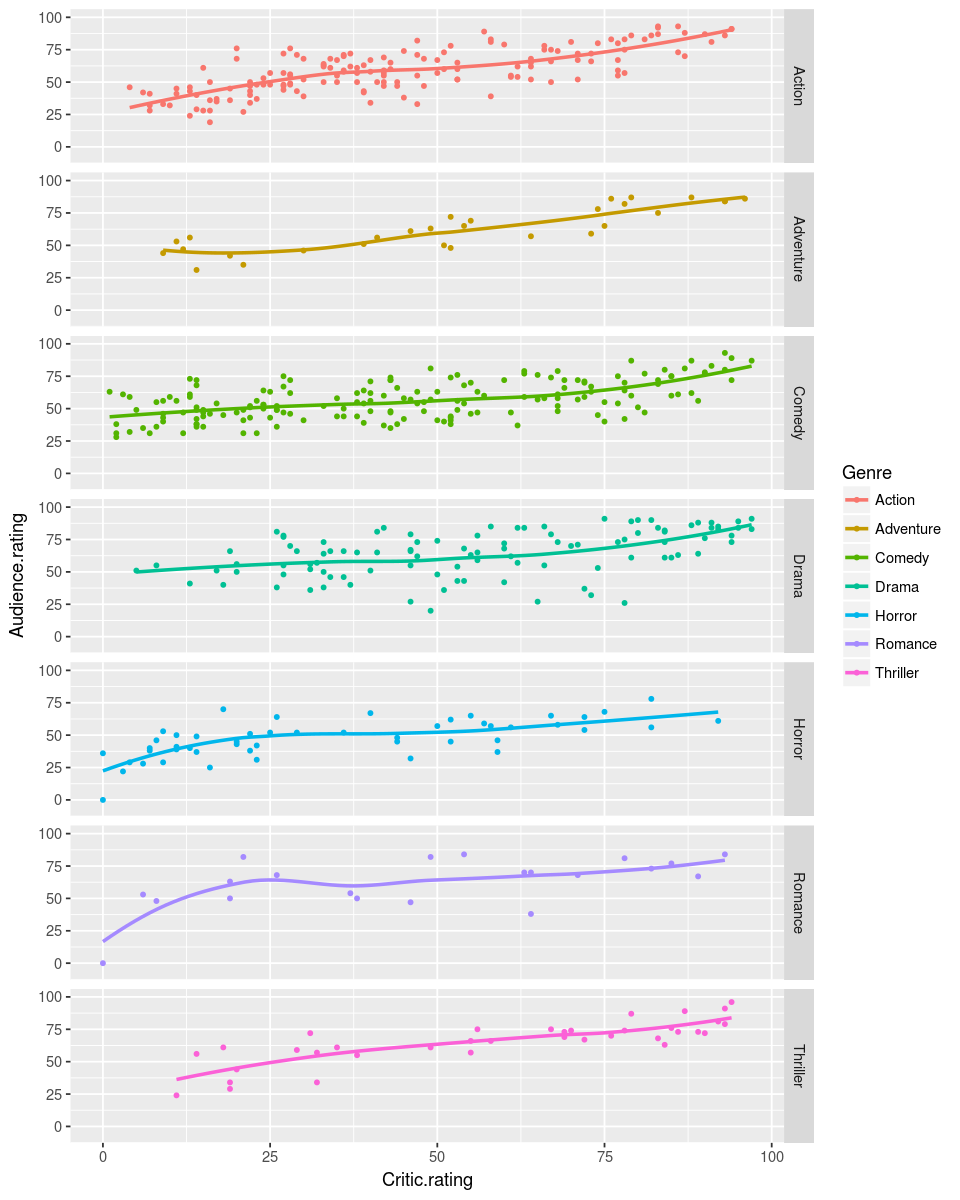

In [157]:
options(repr.plot.height = 10)
w + geom_point(size =1) + facet_grid(Genre~.) + geom_smooth(fill =NA)

`geom_smooth()` using method = 'loess'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  75.99”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  0.0001”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 75.99”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.01”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  78.0

“radius  0.0784”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 19.72”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.28”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  76.28”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  0.0784”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as

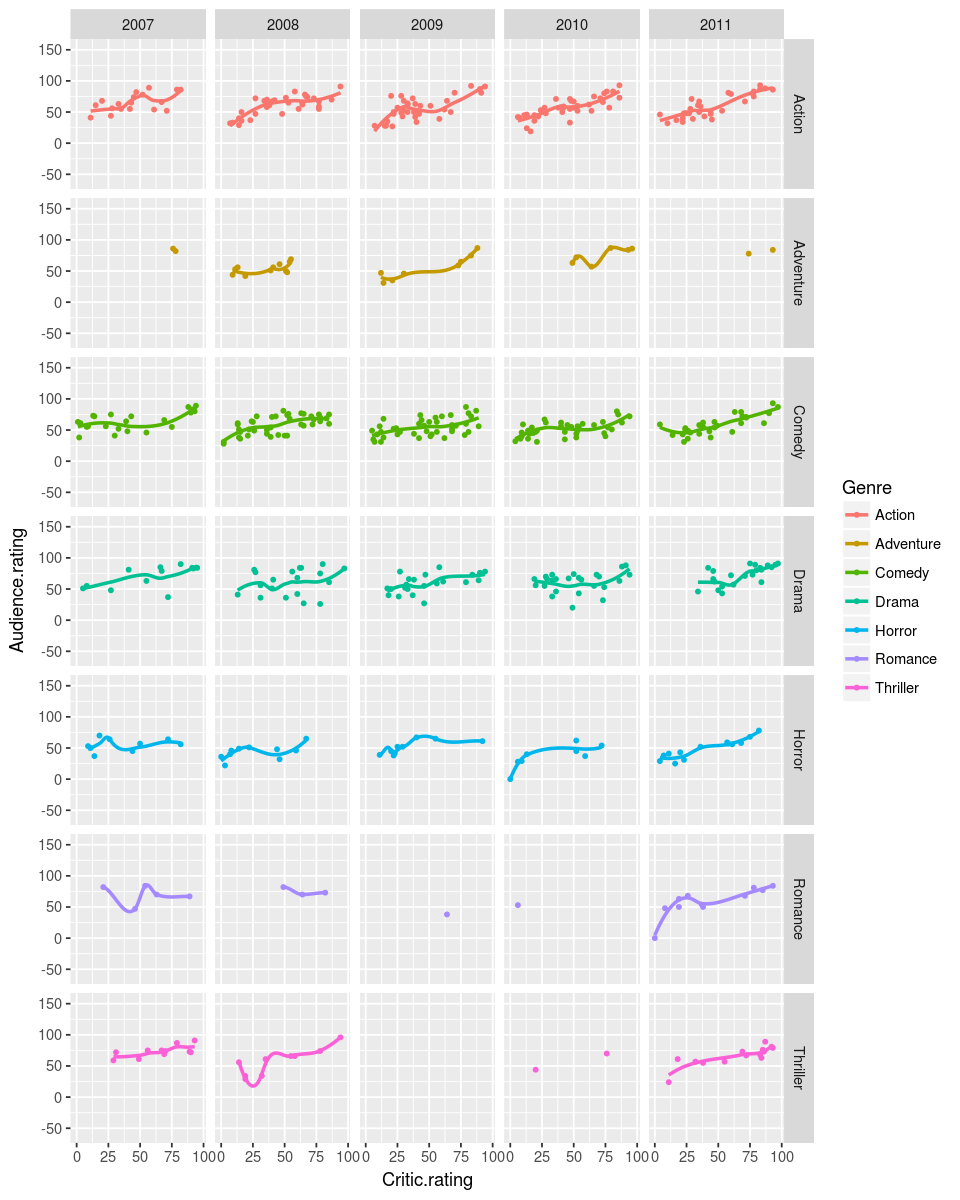

In [159]:
w + geom_point(size =1) + facet_grid(Genre~Year) + geom_smooth(fill =NA)

In [161]:
movie_df[movie_df$Year == 2009 & movie_df$Genre == "Thriller",]

Film,Genre,Critic.rating,Audience.rating,Budget,Year


# COORDINATES

In [162]:
#### SETTING LIMITS AND ZOOMING

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”Warning message:
“Removed 51 rows containing missing values (geom_bar).”

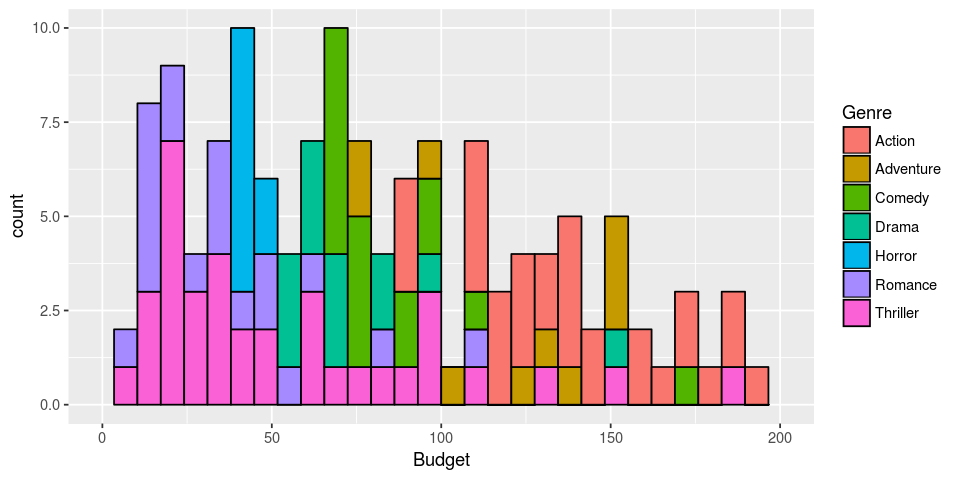

In [179]:
options(repr.plot.height = 4)
v + geom_histogram(color = "black")+ xlim(0,200) + ylim(0,10)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


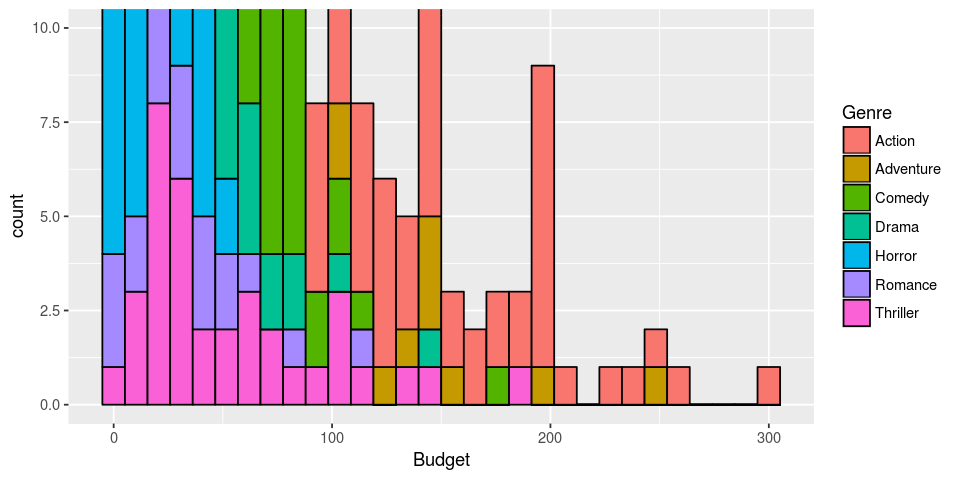

In [181]:
#Zoom-in

v + geom_histogram(color = "black") + coord_cartesian(ylim = c(0,10))